In [ ]:
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
netflix_titles = pd.read_csv('/content/netflix_titles.csv')
netflix_titles.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


In [ ]:
imbd_movies = pd.read_csv('/content/IMDb movies.csv')
imbd_movies.head(1)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45.0,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154.0,NaN,NaN,NaN,NaN,1.0,2.0


In [ ]:
imbd_ratings = pd.read_csv('/content/IMDb ratings.csv')
imbd_ratings.head(1)

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0


In [ ]:
imbd_title_principals = pd.read_csv('/content/IMDb title_principals.csv')
imbd_title_principals.head(1)

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000009,1.0,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"


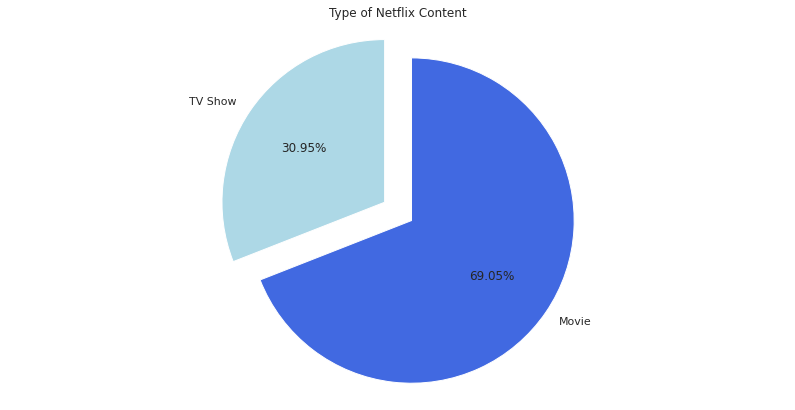

In [ ]:
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(netflix_titles['type'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['lightblue','royalblue'], startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

In [ ]:
movies_count = netflix_titles[netflix_titles.type == "Movie"]
tvshows_count = netflix_titles[netflix_titles["type"] == "TV Show"]

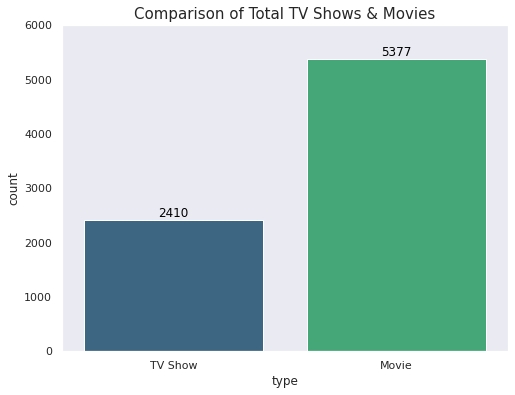

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="type", data=netflix_titles, palette="viridis")

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = netflix_titles['type'].value_counts().max() 
ax.set_ylim([0, 6000])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')


plt.title('Comparison of Total TV Shows & Movies',size='15')
plt.show()

In [ ]:
netflix_titles.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
netflix_titles = netflix_titles[['type','title','country','release_year']]
netflix_titles = netflix_titles.rename(columns={'release_year':'year'})

In [ ]:
imbd_movies.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [ ]:
imbd_movies = imbd_movies[['imdb_title_id','year','title','genre','votes','avg_vote','budget']]

In [ ]:
imbd_ratings.columns

Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       

In [ ]:
len(imbd_movies)

52513

In [ ]:
len(imbd_ratings)

85855

In [ ]:
imbd_movie_ratings = imbd_movies.merge(imbd_ratings, on='imdb_title_id')

In [ ]:
# It is easier to deal with 0 valued data than NaN
imbd_movie_ratings = imbd_movie_ratings.fillna(0)

In [ ]:
imbd_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52513 entries, 0 to 52512
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              52513 non-null  object 
 1   year                       52513 non-null  int64  
 2   title                      52513 non-null  object 
 3   genre                      52513 non-null  object 
 4   votes                      52513 non-null  float64
 5   avg_vote                   52513 non-null  float64
 6   budget                     52513 non-null  object 
 7   weighted_average_vote      52513 non-null  float64
 8   total_votes                52513 non-null  int64  
 9   mean_vote                  52513 non-null  float64
 10  median_vote                52513 non-null  float64
 11  votes_10                   52513 non-null  int64  
 12  votes_9                    52513 non-null  int64  
 13  votes_8                    52513 non-null  int

In [ ]:
def weighted_averages(x):
    number = x[0]
    avg = x[1]
    if number != 0.0:
        return ((number/(number+1000))*avg) + ((1000/(number+1000))*5.9)
    else:
        return 0

votes_per_group = []
# Grab the columns ending in age_votes 
for column in imbd_movie_ratings.columns:
    if column.isnumeric and 'age' in column and 'votes' in column:
        votes_per_group.append(column)
avg_votes_per_group = []
# Grab the columns ending in age_avg_vote
for column in imbd_movie_ratings.columns:
    if column.isnumeric and 'age' in column and 'avg_vote' in column:
        avg_votes_per_group.append(column)

# Create new column in imdb_movie_ratings DataFrame
for i in votes_per_group:
    imbd_movie_ratings['weighted_' + str(i)] = ''
    
tuple_list = []

for x in range(0,len(votes_per_group)):
    tuple_list.append((votes_per_group[x],avg_votes_per_group[x]))
    
# Apply the weighted_avergaes function defined above
for votes, avg_votes in tuple_list:
    imbd_movie_ratings.loc[:,'weighted_' + votes] = imbd_movie_ratings[[votes,avg_votes]].apply(weighted_averages,axis=1)
    
imbd_movie_ratings.head()

,imdb_title_id,year,title,genre,votes,avg_vote,budget,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,weighted_allgenders_0age_votes,weighted_allgenders_18age_votes,weighted_allgenders_30age_votes,weighted_allgenders_45age_votes,weighted_males_allages_votes,weighted_males_0age_votes,weighted_males_18age_votes,weighted_males_30age_votes,weighted_males_45age_votes,weighted_females_allages_votes,weighted_females_0age_votes,weighted_females_18age_votes,weighted_females_30age_votes,weighted_females_45age_votes
0,tt0000009,1894,Miss Jerry,Romance,154.0,5.9,0,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0,5.905179,5.903661,5.890476,5.923671,5.926527,5.901099,5.900000,5.889575,5.924054,5.903382,5.904187,5.900000,5.897433,5.894422
1,tt0000574,1906,The Story of the Kelly Gang,"Biography, Crime, Drama",589.0,6.1,$ 2250,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.0,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,0.0,0.0,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0,5.900100,5.920467,5.919290,5.941256,5.959649,5.900100,5.927768,5.917355,5.927273,5.914286,0.000000,5.900000,5.906745,5.909665
2,tt0001892,1911,Den sorte drøm,Drama,188.0,5.8,0,5.8,188,6.0,6.0,6,6,17,44,52,32,16,5,6,4,0.0,0.0,5.5,25.0,5.8,72.0,6.2,62.0,5.9,146.0,0.0,0.0,5.5,21.0,5.9,67.0,6.2,55.0,5.7,15.0,0.0,0.0,5.8,4.0,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0,0.000000,5.890244,5.893284,5.917514,5.900000,0.000000,5.891773,5.900000,5.915640,5.897044,0.000000,5.899602,5.899602,5.906256
3,tt0002101,1912,Cleopatra,"Drama, History",446.0,5.2,$ 45000,5.2,446,5.3,5.0,15,8,16,62,98,117,63,26,25,16,0.0,0.0,5.3,23.0,5.0,111.0,5.3,193.0,5.1,299.0,0.0,0.0,5.2,20.0,4.9,96.0,5.2,171.0,5.9,39.0,0.0,0.0,5.7,3.0,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0,0.000000,5.886510,5.810081,5.802934,5.715858,0.000000,5.886275,5.812409,5.797780,5.900000,0.000000,5.899402,5.894477,5.904114
4,tt0002130,1911,L'Inferno,"Adventure, Drama, Fantasy",2237.0,7.0,0,7.0,2237,6.9,7.0,210,225,436,641,344,169,66,39,20,87,7.5,4.0,7.0,402.0,7.0,895.0,7.1,482.0,7.0,1607.0,8.0,2.0,7.0,346.0,7.0,804.0,7.0,396.0,7.2,215.0,7.0,2.0,7.0,52.0,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0,5.906375,6.215407,6.419525,6.290283,6.578059,5.904192,6.182764,6.390244,6.212034,6.130041,5.902196,5.954373,6.006100,6.007242


In [ ]:
# Make new df (final_df) by mergin Netlfix data (netflix_titles) with IMDb data (imbd_movie_ratings)
final_df = netflix_titles.merge(imbd_movie_ratings, how = 'inner', left_on=['title', 'year'], right_on=['title', 'year'])

In [ ]:
final_df.head()

,type,title,country,year,imdb_title_id,genre,votes,avg_vote,budget,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,weighted_allgenders_0age_votes,weighted_allgenders_18age_votes,weighted_allgenders_30age_votes,weighted_allgenders_45age_votes,weighted_males_allages_votes,weighted_males_0age_votes,weighted_males_18age_votes,weighted_males_30age_votes,weighted_males_45age_votes,weighted_females_allages_votes,weighted_females_0age_votes,weighted_females_18age_votes,weighted_females_30age_votes,weighted_females_45age_votes
0,Movie,9,United States,2009,tt0472033,"Animation, Action, Adventure",131029.0,7.1,$ 30000000,7.1,131029,7.2,7.0,10234,13668,30176,39890,21416,8435,3452,1676,903,1179,7.1,73.0,7.1,26104.0,7.0,68220.0,7.1,13510.0,7.0,91044.0,7.1,53.0,7.1,19638.0,7.0,56728.0,7.1,11627.0,7.2,19385.0,7.1,14.0,7.3,6146.0,7.2,10800.0,7.2,1662.0,6.8,500.0,6.9,21766.0,7.1,70844.0,5.981640,7.055726,6.984109,7.017298,6.988049,5.960399,7.041855,6.980945,7.004966,7.136228,5.916568,7.104086,7.089831,6.711645
1,Movie,21,United States,2008,tt0478087,"Crime, Drama, History",225698.0,6.8,$ 35000000,6.8,225698,6.9,7.0,13062,14619,43451,79389,46904,16560,6173,2566,1281,1693,6.7,48.0,7.0,52353.0,6.7,113814.0,6.6,17541.0,6.8,158983.0,6.5,31.0,7.0,40955.0,6.7,96713.0,6.6,15083.0,6.9,30105.0,7.1,9.0,7.1,10664.0,6.8,16011.0,6.8,2201.0,6.2,551.0,6.6,37135.0,6.8,121910.0,5.936641,6.979383,6.693032,6.562246,6.794374,5.918041,6.973781,6.691813,6.556476,6.867851,5.910704,6.997119,6.747093,6.518838
2,Movie,Æon Flux,United States,2005,tt0402022,"Action, Adventure, Sci-Fi",122927.0,5.5,$ 62000000,5.5,122927,5.6,6.0,4802,3230,9319,20213,29467,25160,14192,7765,4495,4284,4.2,14.0,5.4,14487.0,5.4,67400.0,5.7,19265.0,5.4,87855.0,3.4,10.0,5.4,11197.0,5.3,57183.0,5.7,16730.0,5.8,15493.0,7.0,4.0,5.9,3127.0,5.7,9521.0,5.9,2280.0,5.1,577.0,5.4,23203.0,5.4,65362.0,5.876529,5.432285,5.407310,5.709869,5.405627,5.875248,5.440994,5.310312,5.711280,5.806063,5.904382,5.900000,5.719010,5.900000
3,Movie,3 Deewarein,NaN,2003,tt0338490,"Crime, Drama",2205.0,7.8,0,7.8,2205,7.9,8.0,361,478,720,387,117,44,14,17,8,59,0.0,0.0,7.8,243.0,7.9,1363.0,6.4,183.0,7.8,1658.0,0.0,0.0,7.8,225.0,7.9,1242.0,6.1,147.0,7.8,175.0,0.0,0.0,7.6,18.0,7.7,112.0,8.0,35.0,5.0,44.0,7.8,278.0,7.8,1246.0,0.000000,6.271440,7.053618,5.977346,7.085177,0.000000,6.248980,7.007939,5.925632,6.182979,0.000000,5.930059,6.081295,5.971014
4,Movie,A Cinderella Story,"United States, Canada",2004,tt0356470,"Comedy, Family, Romance",79453.0,5.9,$ 19000000,5.9,79453,6.3,6.0,10371,4075,8070,13159,16850,12497,6403,3510,2002,2516,5.6,44.0,6.1,28868.0,5.6,26944.0,5.5,3845.0,5.3,20997.0,4.3,6.0,5.3,6775.0,5.2,11079.0,5.3,2324.0,6.2,40955.0,5.5,30.0,6.4,21596.0,5.9,15608.0,6.0,1461.0,4.7,359.0,5.9,13917.0,5.7,35417.0,5.887356,6.093304,5.610736,5.582559,5.327276,5.890457,5.377170,5.257952,5.480505,6.192849,5.888350,6.377872,5.900000,5.959366


In [ ]:
print(final_df.isnull().sum().to_string())

type                               0
title                              0
country                            2
year                               0
imdb_title_id                      0
genre                              0
votes                              0
avg_vote                           0
budget                             0
weighted_average_vote              0
total_votes                        0
mean_vote                          0
median_vote                        0
votes_10                           0
votes_9                            0
votes_8                            0
votes_7                            0
votes_6                            0
votes_5                            0
votes_4                            0
votes_3                            0
votes_2                            0
votes_1                            0
allgenders_0age_avg_vote           0
allgenders_0age_votes              0
allgenders_18age_avg_vote          0
allgenders_18age_votes             0
a

In [ ]:
final_df[final_df['country'].isnull()]

,type,title,country,year,imdb_title_id,genre,votes,avg_vote,budget,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,weighted_allgenders_0age_votes,weighted_allgenders_18age_votes,weighted_allgenders_30age_votes,weighted_allgenders_45age_votes,weighted_males_allages_votes,weighted_males_0age_votes,weighted_males_18age_votes,weighted_males_30age_votes,weighted_males_45age_votes,weighted_females_allages_votes,weighted_females_0age_votes,weighted_females_18age_votes,weighted_females_30age_votes,weighted_females_45age_votes
3,Movie,3 Deewarein,NaN,2003,tt0338490,"Crime, Drama",2205.0,7.8,0,7.8,2205,7.9,8.0,361,478,720,387,117,44,14,17,8,59,0.0,0.0,7.8,243.0,7.9,1363.0,6.4,183.0,7.8,1658.0,0.0,0.0,7.8,225.0,7.9,1242.0,6.1,147.0,7.8,175.0,0.0,0.0,7.6,18.0,7.7,112.0,8.0,35.0,5.0,44.0,7.8,278.0,7.8,1246.0,0.0,6.271440,7.053618,5.977346,7.085177,0.0,6.248980,7.007939,5.925632,6.182979,0.0,5.930059,6.081295,5.971014
131,Movie,Jis Desh Men Ganga Behti Hai,NaN,1960,tt0053965,"Drama, Musical, Romance",407.0,7.4,0,7.4,407,7.5,8.0,58,88,78,92,44,18,5,6,3,15,0.0,0.0,7.3,47.0,7.6,192.0,5.5,68.0,7.1,267.0,0.0,0.0,7.3,38.0,7.4,163.0,5.3,58.0,8.0,47.0,0.0,0.0,7.6,9.0,8.5,28.0,6.4,10.0,4.0,25.0,7.4,47.0,7.3,230.0,0.0,5.962846,6.173826,5.874532,6.152881,0.0,5.951252,6.110232,5.867108,5.994269,0.0,5.915164,5.970817,5.904950


In [ ]:
# Fill in missing country names by doing quick Google search
final_df.loc[6,'country'] = 'India'
final_df.loc[74,'country'] = 'United Kingdom'
final_df.loc[262,'country'] = 'India'
final_df.loc[508,'country'] = 'Indonesia'

In [ ]:
final_df[final_df['country'].isnull()]

,type,title,country,year,imdb_title_id,genre,votes,avg_vote,budget,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes,weighted_allgenders_0age_votes,weighted_allgenders_18age_votes,weighted_allgenders_30age_votes,weighted_allgenders_45age_votes,weighted_males_allages_votes,weighted_males_0age_votes,weighted_males_18age_votes,weighted_males_30age_votes,weighted_males_45age_votes,weighted_females_allages_votes,weighted_females_0age_votes,weighted_females_18age_votes,weighted_females_30age_votes,weighted_females_45age_votes
3,Movie,3 Deewarein,NaN,2003.0,tt0338490,"Crime, Drama",2205.0,7.8,0,7.8,2205.0,7.9,8.0,361.0,478.0,720.0,387.0,117.0,44.0,14.0,17.0,8.0,59.0,0.0,0.0,7.8,243.0,7.9,1363.0,6.4,183.0,7.8,1658.0,0.0,0.0,7.8,225.0,7.9,1242.0,6.1,147.0,7.8,175.0,0.0,0.0,7.6,18.0,7.7,112.0,8.0,35.0,5.0,44.0,7.8,278.0,7.8,1246.0,0.0,6.271440,7.053618,5.977346,7.085177,0.0,6.248980,7.007939,5.925632,6.182979,0.0,5.930059,6.081295,5.971014
131,Movie,Jis Desh Men Ganga Behti Hai,NaN,1960.0,tt0053965,"Drama, Musical, Romance",407.0,7.4,0,7.4,407.0,7.5,8.0,58.0,88.0,78.0,92.0,44.0,18.0,5.0,6.0,3.0,15.0,0.0,0.0,7.3,47.0,7.6,192.0,5.5,68.0,7.1,267.0,0.0,0.0,7.3,38.0,7.4,163.0,5.3,58.0,8.0,47.0,0.0,0.0,7.6,9.0,8.5,28.0,6.4,10.0,4.0,25.0,7.4,47.0,7.3,230.0,0.0,5.962846,6.173826,5.874532,6.152881,0.0,5.951252,6.110232,5.867108,5.994269,0.0,5.915164,5.970817,5.904950


In [ ]:
def plot_data(col_name, graph_title, xlabel = 'Rating'):
    
    rating = final_df[[col_name]].loc[:, col_name].sort_values(ascending=False).head(10).values
    index = final_df[[col_name]].loc[:, col_name].sort_values(ascending=False).index[:10]

    sns.set_context('poster')
    sns.set(rc={'figure.figsize':(10,8)})
    sns.set_style('darkgrid')

    fig, ax = plt.subplots()
    title = []

    for i in index:
        title.append(final_df.loc[i, 'title'])

    y_pos = np.arange(len(title))

    ratings = []
    for r in rating:
        ratings.append(r)

    ax.barh(y_pos, ratings, edgecolor='black',color=('#0094FD','#1BA1FF','#37ACFF','#63BEFE',
                                                     '#83CBFD','#A6DAFF','#C2E5FF','#D7EEFF','#E6F4FF','#F5FBFF'))
    ax.set_yticks(y_pos)
    ax.set_yticklabels(title, fontsize=15)
    ax.invert_yaxis()
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel('Movie', fontsize=15)
    ax.set_title(graph_title, fontsize=20)


    plt.show()

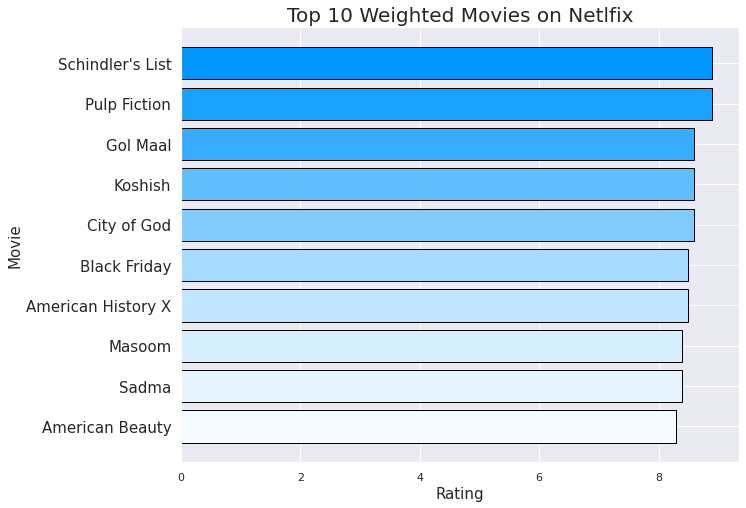

In [ ]:
plot_data('weighted_average_vote', 'Top 10 Weighted Movies on Netlfix')

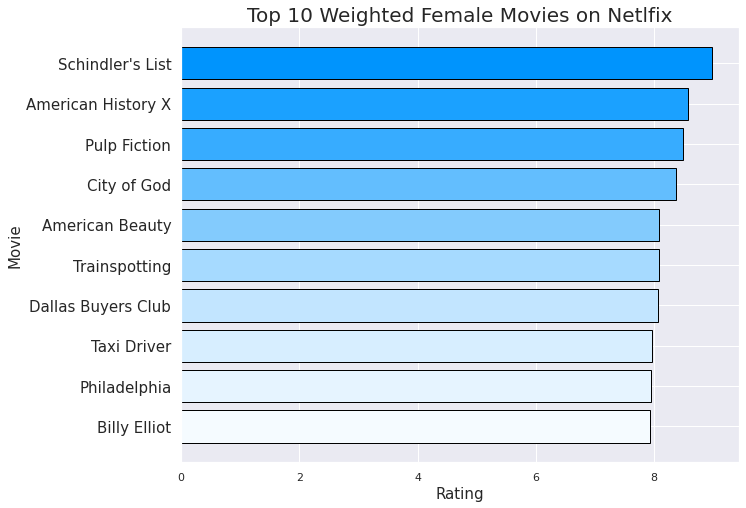

In [ ]:
plot_data('weighted_females_allages_votes', 'Top 10 Weighted Female Movies on Netlfix')

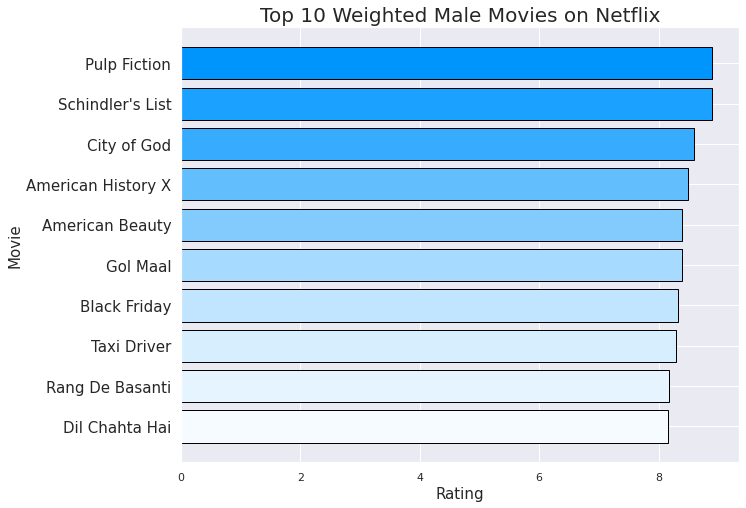

In [ ]:
plot_data('weighted_males_allages_votes', 'Top 10 Weighted Male Movies on Netflix')

In [ ]:
def plot_release_year(release_year, graph_title, xlabel = 'Rating'):
            
    df = final_df[final_df['year'] == release_year]
    
    rating = df[['weighted_average_vote']].loc[:, 'weighted_average_vote'].sort_values(ascending=False).head(10).values
    index = df[['weighted_average_vote']].loc[:, 'weighted_average_vote'].sort_values(ascending=False).index[:10]

    sns.set_context('poster')
    sns.set(rc={'figure.figsize':(10,8)})
    sns.set_style('darkgrid')

    fig, ax = plt.subplots()
    title = []
    for i in index:
        title.append(final_df.loc[i, 'title'])

    y_pos = np.arange(len(title))

    ratings = []
    for r in rating:
        ratings.append(r)

    ax.barh(y_pos, ratings, edgecolor='black',color=('#0094FD','#1BA1FF','#37ACFF','#63BEFE',
                                                     '#83CBFD','#A6DAFF','#C2E5FF','#D7EEFF','#E6F4FF','#F5FBFF'))
    ax.set_yticks(y_pos)
    ax.set_yticklabels(title, fontsize=15)
    ax.invert_yaxis()
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel('Movie', fontsize=15)
    ax.set_title(graph_title, fontsize=20)

    plt.show()

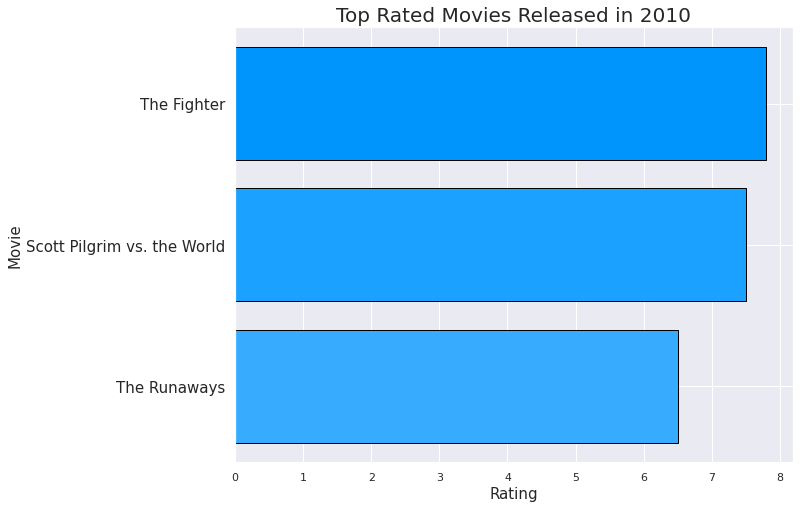

In [ ]:
plot_release_year(2010,'Top Rated Movies Released in 2010')


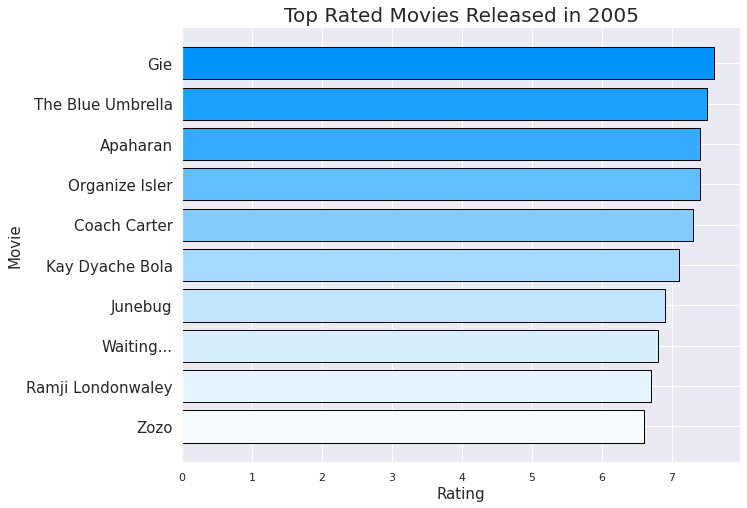

In [ ]:
plot_release_year(2005,'Top Rated Movies Released in 2005')

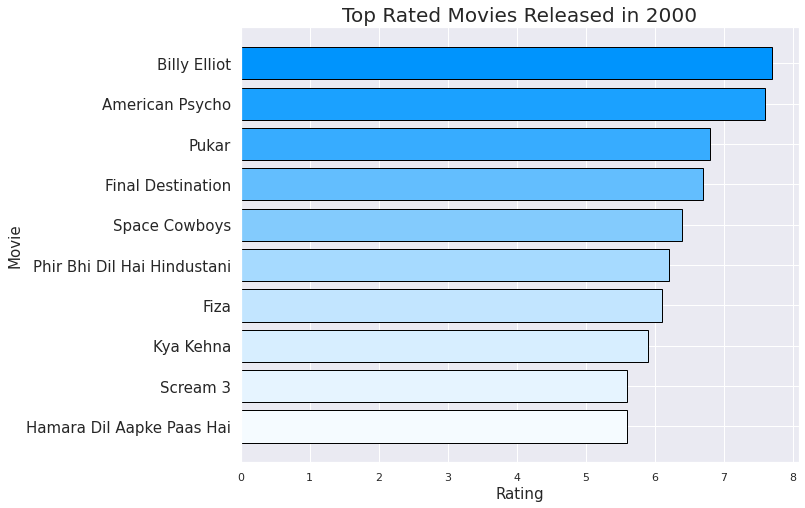

In [ ]:
plot_release_year(2000,'Top Rated Movies Released in 2000')